<h2 style="line-height:3rem; font-size: 2rem"> Analyzing Monthly Electricity Production Patterns in Finland
 </h2>

,Month,mean,std
0,January,9866.077635,1528.030051
1,February,9503.081366,1373.734067
2,March,8530.047771,1009.144542
3,April,7756.249916,959.044754
4,May,6945.827631,978.733125
5,June,6818.798400,1021.596119
6,July,6795.724022,1093.956393
7,August,6784.268928,1151.472746
8,September,7195.351071,1106.683404
9,October,8354.270409,1324.784648


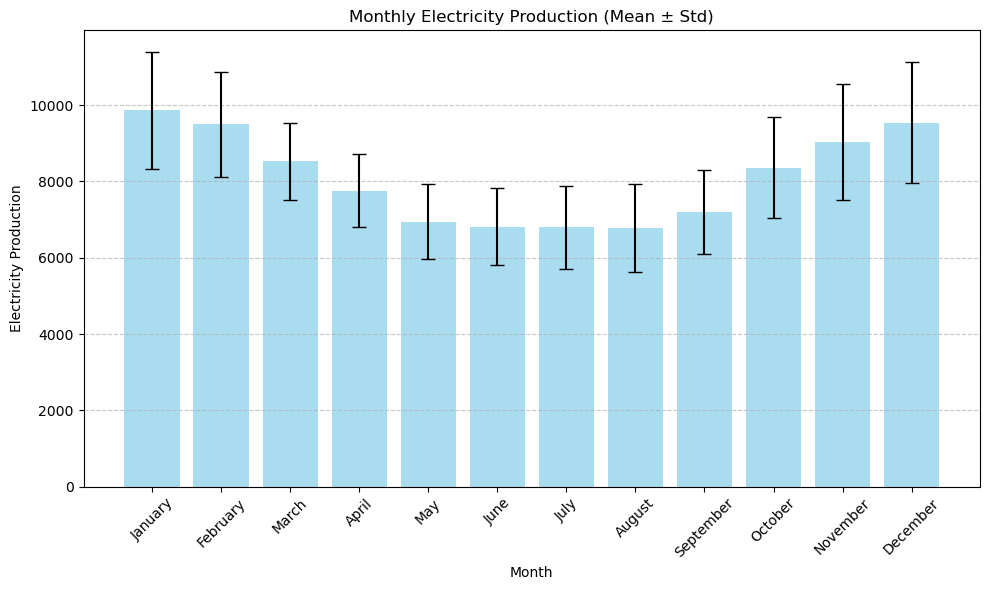

In [21]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from IPython.display import display

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# 15 February 2025


# Data Source: https://data.fingrid.fi/en/datasets/74
# https://data.fingrid.fi/en/datasets?search=Consumption


cwd = os.getcwd()
env_name = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', 'Localhost')

if(env_name == "Localhost"):
    df = pd.read_csv("Datasets/Electricity_Production_Finland_By_FinGrid.csv")
else:
    df = pd.read_csv("/kaggle/input/d/ahmadsharif/finland-electricity-production/Electricity_Production_Finland_By_FinGrid.csv")

df_data = pd.DataFrame(df)

# Convert Start_Time to datetime and extract components
df_data['Start_Time'] = pd.to_datetime(df_data['Start_Time'])
df_data['Year'] = df_data['Start_Time'].dt.year
df_data['Month'] = df_data['Start_Time'].dt.month
df_data['Day'] = df_data['Start_Time'].dt.day

# Compute monthly mean and std
monthly_stats = df_data.groupby('Month')['Electricity_production_Finland'].agg(['mean', 'std']).reset_index()

# Replace month numbers with names
monthly_stats['Month'] = monthly_stats['Month'].map({
    1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
    7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'
})

# Display the styled table with a gradient
styled_table = monthly_stats.style.background_gradient(cmap='Blues', subset=['mean', 'std'])
display(styled_table)


# Plotting
plt.figure(figsize=(10, 6))
plt.bar(monthly_stats['Month'], monthly_stats['mean'], yerr=monthly_stats['std'], capsize=5, color='skyblue', alpha=0.7)
plt.title('Monthly Electricity Production (Mean ± Std)')
plt.xlabel('Month')
plt.ylabel('Electricity Production')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show();


<h2 style="line-height:3rem;"> Highest production occurs during winter months, especially January (9866 MWh) and February (9503 MWh).

Lowest production happens during the summer months, with August (6784 MWh) and July (6796 MWh) showing the least average production.
 </h2>

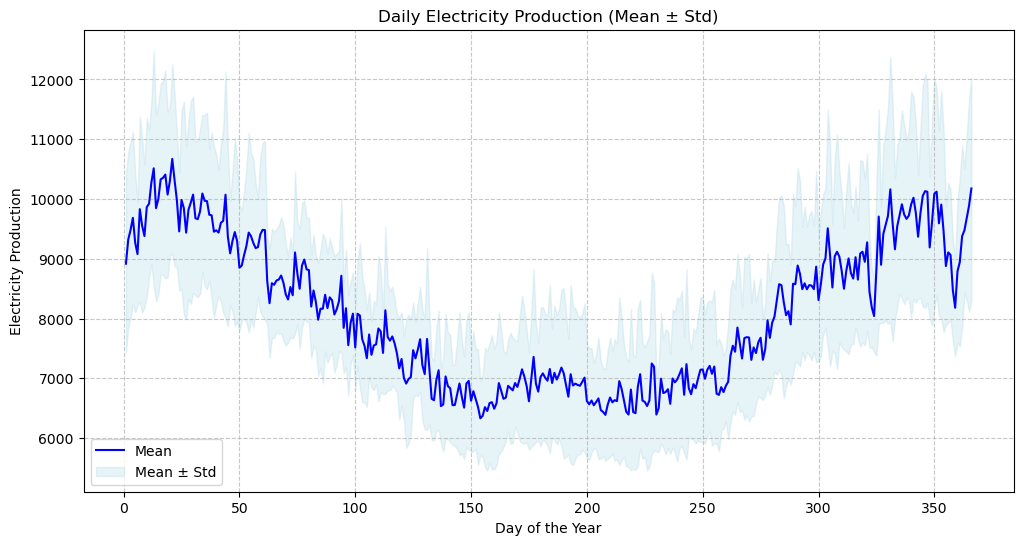

In [9]:
plt.figure(figsize=(12, 6))
# Add a 'DayOfYear' column to group by day of year
df_data['DayOfYear'] = df_data['Start_Time'].dt.dayofyear

# Compute mean and std of electricity production per day of the year
daily_stats = df_data.groupby('DayOfYear')['Electricity_production_Finland'].agg(['mean', 'std']).reset_index()

plt.plot(daily_stats['DayOfYear'], daily_stats['mean'], label='Mean', color='blue')
plt.fill_between(
    daily_stats['DayOfYear'],
    daily_stats['mean'] - daily_stats['std'],
    daily_stats['mean'] + daily_stats['std'],
    color='lightblue',
    alpha=0.3,
    label='Mean ± Std'
)
plt.title('Daily Electricity Production (Mean ± Std)')
plt.xlabel('Day of the Year')
plt.ylabel('Electricity Production')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show();